In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.patches as mpatches
import warnings
# import optuna
import time
# from itables import init_notebook_mode
from scipy import stats
# init_notebook_mode(all_interactive=True)
from sklearn.feature_selection import VarianceThreshold
import sklearn.feature_selection as fs
from sklearn.feature_selection import SelectFromModel
from itertools import compress


#oversampling
warnings.filterwarnings('ignore')
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("new_dataset.csv",index_col = 0)

In [3]:
# Display the first few rows of the dataset to understand its structure and content
df.head()

,Total Assets,Total Current Assets,Total Non-Current Assets,Total Liabilities,Total Current Liabilities,Total Non-Current Liabilities,Total Equity,Cash Generated from Operating Activities,Income/Loss before Non-Cash Adjustment,Changes in Operating Capital,...,Price to Changes in Operating Capital ratio,Price to Cash Flow from Investing Activities ratio,Price to Cash Flow from Financing Activities ratio,Price to Change in Cash ratio,"Price to Cash and Cash Equivalents, Beginning of Period ratio",Price to Gross Profit ratio,Price to Total Revenue ratio,Price to Total Operating Profit/Loss ratio,Price to Diluted EPS ratio,Price to Net Income ratio
0,183670000.0,113239000.0,70431000.0,68658000.0,48601000.0,20057000.0,115012000.0,7242000.0,4283000.0,-6224000.0,...,-4.182796e+05,-3.050269e+06,3.175403e+06,6.118280e+05,1.478898e+06,2.973522e+06,8.766734e+06,3.635081e+05,0.018817,2.857761e+05
1,273475000.0,153928000.0,119547000.0,108077000.0,74080000.0,33997000.0,165398000.0,-15212000.0,10793000.0,-42921000.0,...,-3.805053e+06,-5.462766e+06,6.481738e+06,-3.296099e+05,2.852394e+06,5.359309e+06,1.683537e+07,1.211525e+06,0.057624,9.526908e+05
2,322318000.0,157552000.0,164766000.0,94934000.0,59973000.0,34961000.0,227384000.0,57104000.0,31234000.0,16379000.0,...,9.657430e+05,-2.449469e+06,2.737028e+05,1.191215e+06,1.655307e+06,5.127005e+06,1.537223e+07,1.366981e+06,0.103774,1.838134e+06
3,452984000.0,229697000.0,223287000.0,119708000.0,70708000.0,49000000.0,333276000.0,84284000.0,73951000.0,-20022000.0,...,-8.444539e+05,-2.959047e+06,7.694644e+05,1.365205e+06,2.191649e+06,7.013075e+06,1.612522e+07,3.676171e+06,0.154787,3.117272e+06
4,466840000.0,194275000.0,272565000.0,137746000.0,77418000.0,60328000.0,329094000.0,14029000.0,-2146000.0,-22346000.0,...,-5.911640e+05,-2.024180e+06,9.207143e+05,-7.323281e+05,2.220847e+06,2.322037e+06,7.075794e+06,-2.601587e+05,-0.002910,-5.717278e+04


Given the broad nature of this dataset, we could perform several types of analysis, such as:

**Descriptive Statistics**: Provide a summary of the main statistical measures for each column (mean, median, standard deviation, etc.).

**Correlation Analysis**: Determine the relationships between different financial metrics (e.g., between total assets and total equity, cash flows from operating activities, and net income).

**Segment Analysis**: If the dataset includes identifiers that allow for segmentation (such as industry sectors or company names), we could analyze financial metrics by these segments.

# DESCRIPTIVE ANALYSIS

The descriptive statistics for the dataset provide a comprehensive overview of various financial metrics across all entries. Here are some key observations:

**Total Assets**: The mean value is approximately 3.54 trillion, with a standard deviation indicating significant variation among companies.

**Total Liabilities and Equity**: Both show wide ranges, reflecting the diversity in size and financial structure of the companies included.

**Financial Ratios**: Ratios like the Price to Earnings Ratio, Price to Cash Flow Ratio, and others vary widely, suggesting a mix of industries and financial health among the companies.

Due to the extensive number of metrics and their technical nature, here are a few specific highlights:

**Price to Earnings Ratio (P/E)**: The mean P/E ratio is around 1.37 with a standard deviation, indicating varied investor expectations and company earnings performance.

**Total Revenue to Total Assets Ratio**: This ratio has a mean value close to 0.92, suggesting, on average, companies are generating revenue close to the value of their assets.

**Total Assets to Total Equity Ratio**: With a mean of approximately 2.53, this indicates, on average, companies have more than double their equity in assets, which could suggest varying levels of leverage.

These statistics offer a snapshot into the financial health and operational performance of the companies in the dataset. For more detailed analysis or specific insights, further exploration into individual metrics or segments of data is required.

In [4]:
# Calculate descriptive statistics for the dataset
descriptive_stats = df.describe()

# Since the dataset has many columns, let's transpose the result for better readability
descriptive_stats_transposed = descriptive_stats.T

# Display the descriptive statistics
descriptive_stats_transposed

,count,mean,std,min,25%,50%,75%,max
Total Assets,3944.0,1.749797e+11,2.199246e+12,1.129660e+05,3.489132e+08,1.234200e+09,5.516662e+09,4.098981e+13
Total Current Assets,3944.0,5.937442e+10,7.169121e+11,8.987000e+04,1.957612e+08,6.149625e+08,2.322485e+09,1.318707e+13
Total Non-Current Assets,3944.0,1.156050e+11,1.492164e+12,0.000000e+00,1.096822e+08,5.326215e+08,2.734412e+09,2.829980e+13
Total Liabilities,3944.0,9.853360e+10,1.271360e+12,1.417800e+05,1.194025e+08,5.751075e+08,2.902000e+09,2.436679e+13
Total Current Liabilities,3944.0,5.189516e+10,6.766275e+11,1.417800e+05,7.297700e+07,2.595775e+08,1.253610e+09,1.399482e+13
Total Non-Current Liabilities,3944.0,4.663843e+10,6.027971e+11,0.000000e+00,2.510000e+07,2.403955e+08,1.507216e+09,1.210131e+13
Total Equity,3944.0,7.644606e+10,9.454520e+11,-5.768000e+09,1.385788e+08,5.422190e+08,2.213013e+09,1.841270e+13
Cash Generated from Operating Activities,3944.0,2.561906e+10,3.150995e+11,-6.147000e+09,4.631250e+06,8.495800e+07,4.812362e+08,7.262138e+12
Income/Loss before Non-Cash Adjustment,3944.0,4.379376e+09,9.799030e+10,-3.195585e+12,-2.446550e+07,1.673950e+07,2.276788e+08,1.937052e+12
Changes in Operating Capital,3944.0,-2.827516e+09,8.011524e+10,-2.530622e+12,-4.103825e+07,-3.142500e+06,1.268050e+07,1.236129e+12


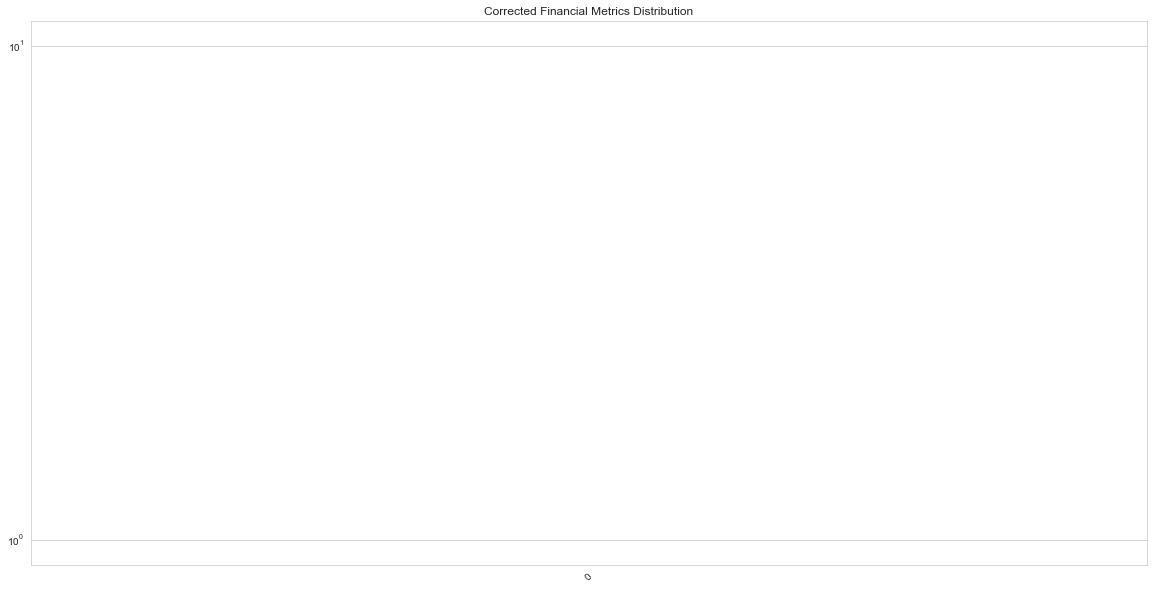

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# We use these columns for a simplified overview
columns_to_visualize_corrected = [
    'Total Assets',
    'Total Liabilities',
    'Total Equity',
    'Cash Generated from Operating Activities'
]

# Create a dataframe with the selected columns
subset_data_corrected = df[columns_to_visualize_corrected]

# Create a boxplot for each column to show distribution, outliers, etc.
plt.figure(figsize=(20, 10))
sns.boxplot(df=subset_data_corrected)
plt.xticks(rotation=45)
plt.title('Corrected Financial Metrics Distribution')
plt.yscale('log')  # Using log scale due to wide range of values
plt.show()

Here we show the distribution of selected financial metrics: Total Assets, Total Liabilities, Total Equity, and Cash Generated from Operating Activities. The boxplots are displayed on a logarithmic scale due to the wide range of values, which helps in better visualizing the spread and identifying outliers in these financial metrics. This visualization provides a quick overview of the financial status across the dataset, highlighting the variability and scale of these metrics among different entries.

Histograms can provide a clearer view of the distribution of values, including the spread and central tendency, without being as affected by extreme values as boxplots can be.

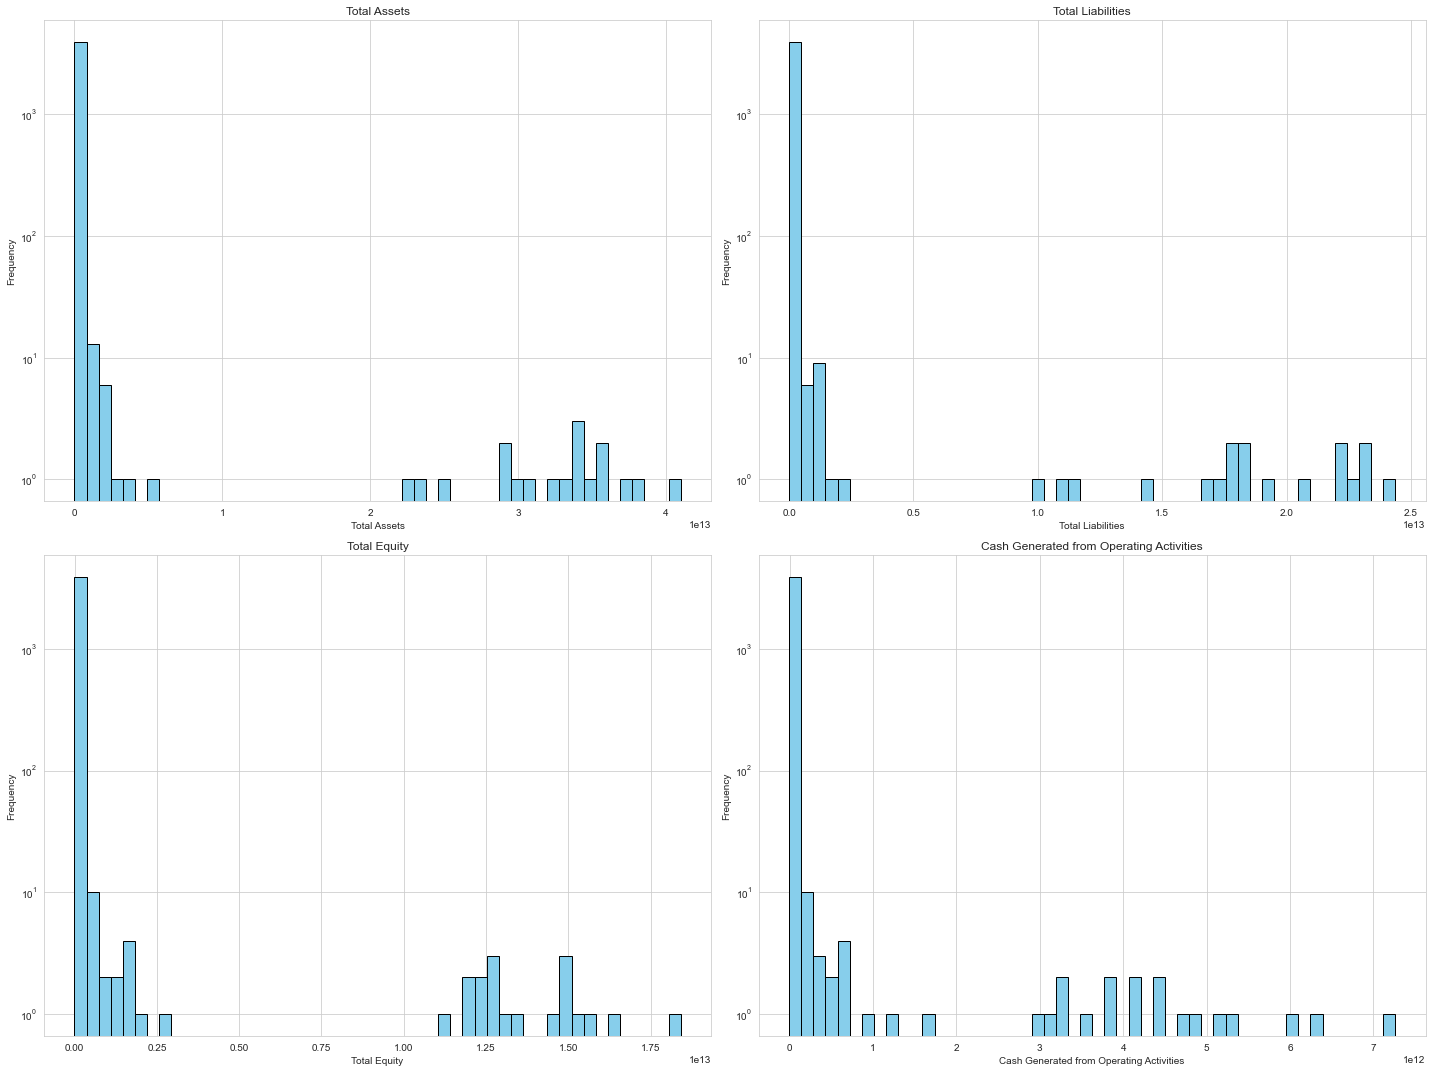

In [16]:
# Create histograms for the selected financial metrics to better understand their distribution
plt.figure(figsize=(20, 15))

for i, column in enumerate(columns_to_visualize_corrected, 1):
    plt.subplot(2, 2, i)
    df[column].hist(bins=50, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.yscale('log')  # Using log scale to better visualize the distribution
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Each histogram shows the frequency distribution of values for these metrics on a logarithmic scale for the y-axis. This approach helps in visualizing the distribution's spread, central tendency, and the presence of any outliers or skewness in the data.

The histograms reveal how the data points are distributed across different ranges for each metric, providing insights into the financial structure and operations of the entities represented in the dataset. 

# CORRELATION ANALYSIS

To provide a different perspective on the dataset, we can create a correlation heatmap. A correlation heatmap visualizes the correlation coefficients between all pairs of numerical variables in the dataset, offering insights into how these financial metrics relate to one another. High positive or negative values indicate strong relationships, while values close to zero suggest little to no linear correlation. 

Let's create a correlation heatmap for the dataset.

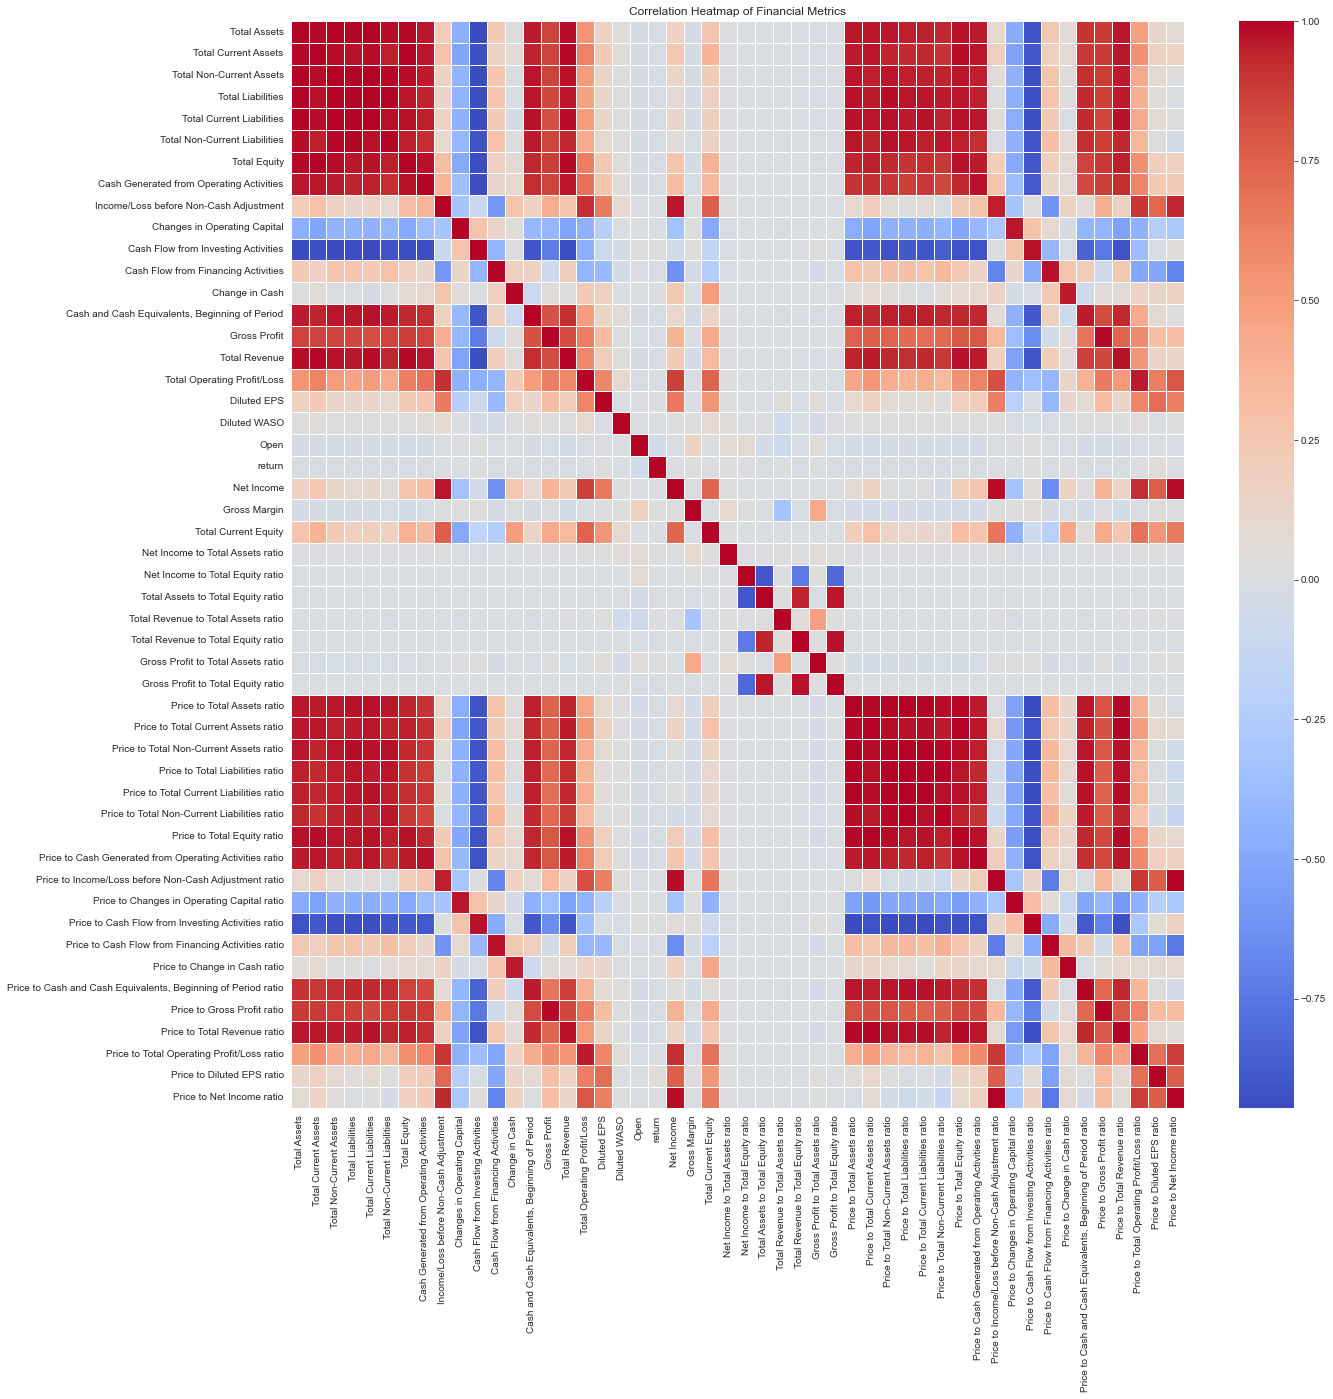

In [17]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

In this visualization:

Colors closer to red indicate a positive correlation, meaning that as one metric increases, the other tends to increase as well.

Colors closer to blue represent a negative correlation, indicating that as one metric increases, the other tends to decrease.

Colors near the middle of the color spectrum (lighter shades) suggest little to no correlation between the metrics.

This heatmap can be instrumental in identifying patterns and relationships that may not be immediately apparent. For instance, strong correlations (either positive or negative) between certain metrics could point to underlying financial principles or industry-specific practices that influence these relationships.

####################################################

Correlation analysis can help us understand the relationships between different financial metrics in the dataset. By examining the correlation coefficients, we can identify which pairs of variables are positively correlated, are negatively correlated, or show little to no linear relationship.

For this analysis, we'll focus on a selection of key financial metrics to keep the analysis manageable and insightful. We consider the following metrics for correlation analysis:

Total Assets

Total Liabilities

Total Equity

Cash Generated from Operating Activities

Gross Profit

Net Income

We'll calculate the correlation coefficients for these metrics and visualize them using a heatmap for easier interpretation. This will help us identify potential relationships that might be of interest for further analysis or decision-making.

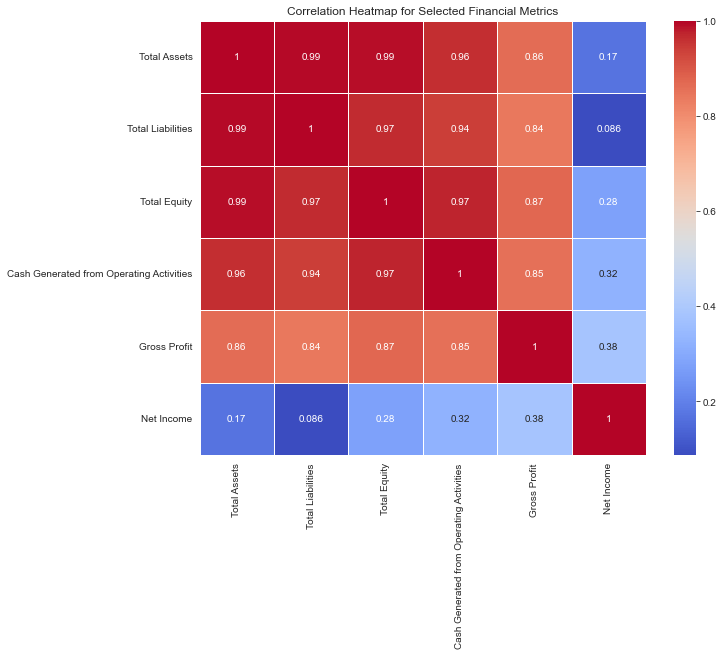

In [18]:
# Select key financial metrics for correlation analysis
metrics_for_correlation = [
    'Total Assets',
    'Total Liabilities',
    'Total Equity',
    'Cash Generated from Operating Activities',
    'Gross Profit',
    'Net Income'
]

# Calculate the correlation matrix for the selected metrics
correlation_matrix_selected = df[metrics_for_correlation].corr()

# Plot the correlation heatmap for the selected metrics
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Financial Metrics')
plt.show()

The correlation heatmap shows how each pair of metrics is related. Here are some key takeaways:

**Total Assets and Total Liabilities**: There's a strong positive correlation, indicating that as the total assets of a company increase, its total liabilities tend to increase as well. This relationship is expected, as larger companies often have both higher assets and liabilities.

**Total Assets and Total Equity**: Also positively correlated, suggesting that companies with more assets generally have more equity. This is consistent with the accounting equation where Assets = Liabilities + Equity.

**Cash Generated from Operating Activities and Net Income**: This shows a positive correlation, indicating that companies with higher net income typically generate more cash from their operating activities, which is a good sign of operational efficiency.

**Gross Profit and Net Income**: There's a positive correlation between these two metrics, suggesting that higher gross profits often lead to higher net income. This relationship is intuitive, as gross profit is a major component of net income before subtracting expenses and taxes.

These correlations can provide valuable insights into financial management and operational effectiveness. 

# SEGMENT ANALYSIS

For a segment analysis, we typically need a categorical variable that divides the dataset into different groups or segments. This type of analysis allows us to compare financial metrics across different segments to identify trends, outliers, or significant differences that could inform strategic decisions or further analysis.

One approach will be to create segments based on a quantitative metric, categorizing companies into groups based on their size or performance. 

Let's proceed with a simple segmentation based on a financial metric. For example, we will segment companies into groups based on their Total Assets, Net Income and then analyze differences in Cash Generated from Operating Activities, across these segments.

##### *Total Assets*

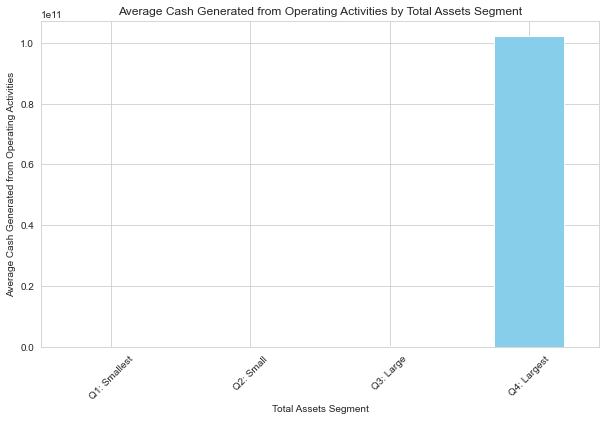

Total Assets Segment
Q1: Smallest    1.334498e+06
Q2: Small       5.321418e+07
Q3: Large       2.576487e+08
Q4: Largest     1.021640e+11
Name: Cash Generated from Operating Activities, dtype: float64

In [20]:
# For segment analysis based on Total Assets, we will categorize companies into groups
# We'll define categories based on quartiles of the Total Assets distribution for simplicity

# Define quartiles for Total Assets to segment companies
total_assets_quartiles = df['Total Assets'].quantile([0.25, 0.5, 0.75])

# Categorize companies based on Total Assets quartiles
df['Total Assets Segment'] = pd.cut(df['Total Assets'],
                                    bins=[-1, total_assets_quartiles[0.25], total_assets_quartiles[0.5],
                                          total_assets_quartiles[0.75], df['Total Assets'].max()],
                                          labels=['Q1: Smallest', 'Q2: Small', 'Q3: Large', 'Q4: Largest'])

# Analyze another metric, like Cash Generated from Operating Activities, across Total Assets segments
segment_analysis_metric = df.groupby('Total Assets Segment')['Cash Generated from Operating Activities'].mean()

# Visualize the results
plt.figure(figsize=(10, 6))
segment_analysis_metric.plot(kind='bar', color='skyblue')
plt.title('Average Cash Generated from Operating Activities by Total Assets Segment')
plt.xlabel('Total Assets Segment')
plt.ylabel('Average Cash Generated from Operating Activities')
plt.xticks(rotation=45)
plt.show()

# Display the mean values for context
segment_analysis_metric

The bar chart visualizes the average Cash Generated from Operating Activities for companies segmented by their Total Assets into quartiles: Q1 (Smallest), Q2 (Small), Q3 (Large), and Q4 (Largest). The analysis reveals significant differences across segments:

Q1: Smallest companies have an average of approximately 1.33 million in Cash Generated from Operating Activities.

Q2: Small companies show a substantial increase, with an average of around 53.21 million.

Q3: Large companies further increase to an average of approximately 257.65 million.

Q4: Largest companies have a dramatically higher average of about 102.16 billion.

This analysis suggests a strong positive relationship between the size of a company (as measured by Total Assets) and its ability to generate cash from operating activities. The largest companies (Q4) generate substantially more operating cash flow than smaller companies, highlighting the impact of scale on operational efficiency and financial performance.

Such insights indicate that larger companies might have better cash flow stability and operational efficiency, which are important factors for investment and strategic decisions.

##### *Net Income*

We adjust the binning strategy to ensure it accommodates all values in the Net Income column appropriately, starting from the minimum value in that column rather than a fixed -1. 

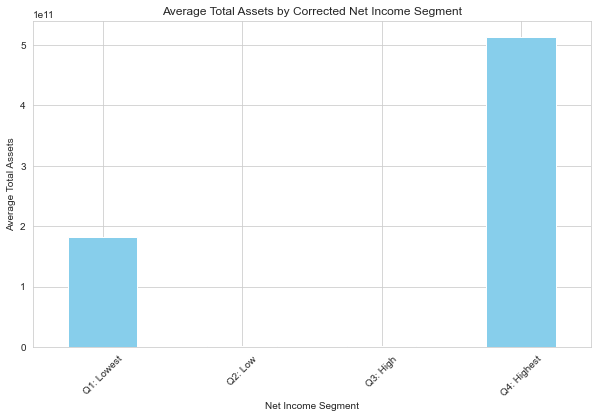

Net Income Segment
Q1: Lowest     1.821437e+11
Q2: Low        1.624463e+09
Q3: High       2.204753e+09
Q4: Highest    5.139458e+11
Name: Total Assets, dtype: float64

In [38]:
# For segment analysis based on Net Income, we will categorize companies into groups
# We'll define categories based on quartiles of the Net Income distribution for simplicity

# Define quartiles for Net Income to segment companies
net_income_quartiles = df['Net Income'].quantile([0.25, 0.5, 0.75])

# Adjust the binning strategy for Net Income to start from the minimum value in the column
min_net_income = df['Net Income'].min()

# Categorize companies based on Net Income quartiles with adjusted bins
df['Net Income Segment'] = pd.cut(df['Net Income'],
                                  bins=[min_net_income-1, net_income_quartiles[0.25], net_income_quartiles[0.5],
                                        net_income_quartiles[0.75], df['Net Income'].max()],
                                        labels=['Q1: Lowest', 'Q2: Low', 'Q3: High', 'Q4: Highest'])

# Re-analyze Total Assets across the new Net Income segments
segment_analysis_metric_net_income = df.groupby('Net Income Segment')['Total Assets'].mean()

# visualize the results with the segments
plt.figure(figsize=(10, 6))
segment_analysis_metric_net_income.plot(kind='bar', color='skyblue')
plt.title('Average Total Assets by Net Income Segment')
plt.xlabel('Net Income Segment')
plt.ylabel('Average Total Assets')
plt.xticks(rotation=45)
plt.show()

# Display the mean values for context
segment_analysis_metric_net_income

The corrected bar chart visualizes the average Total Assets for companies segmented by their Net Income into quartiles: Q1 (Lowest), Q2 (Low), Q3 (High), and Q4 (Highest). This segmentation reveals interesting insights:

Q1: Lowest segment shows an exceptionally high average Total Assets value, approximately 182.14 billion. This could indicate that some companies with large assets might have experienced losses or low net income during the period, potentially due to significant investments, depreciation, or other factors affecting net income negatively.

Q2: Low and Q3: High segments have average Total Assets of approximately 1.62 billion and 2.20 billion, respectively. These figures suggest a moderate level of assets relative to their net income categories.

Q4: Highest segment demonstrates a significantly higher average of Total Assets, about 513.95 billion, indicating that companies with the highest net income also tend to have large asset bases. This could reflect successful operations, efficient asset utilization, or a combination of high-revenue-generating activities and effective cost management.

##### *Cash Generated from Operating Activities*

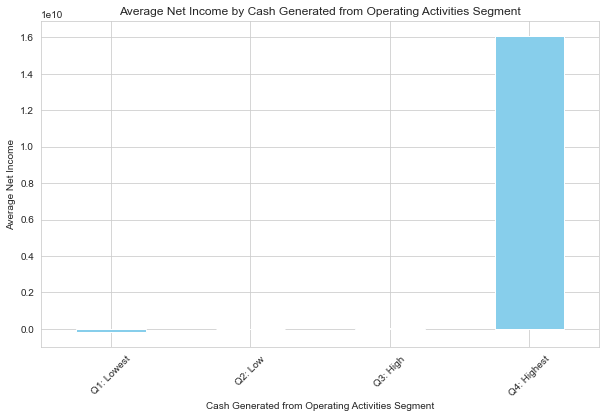

Cash Generated Segment
Q1: Lowest    -1.892626e+08
Q2: Low       -1.157848e+07
Q3: High       7.408503e+07
Q4: Highest    1.608492e+10
Name: Net Income, dtype: float64

In [22]:
# For segment analysis based on Cash Generated from Operating Activities, we will categorize companies into groups
# We'll define categories based on quartiles of the Cash Generated from Operating Activities distribution for simplicity

# Define quartiles for Cash Generated from Operating Activities to segment companies
cash_generated_quartiles = df['Cash Generated from Operating Activities'].quantile([0.25, 0.5, 0.75])

# Categorize companies based on Cash Generated from Operating Activities quartiles
df['Cash Generated Segment'] = pd.cut(df['Cash Generated from Operating Activities'],
                                      bins=[df['Cash Generated from Operating Activities'].min()-1, cash_generated_quartiles[0.25], cash_generated_quartiles[0.5],
                                            cash_generated_quartiles[0.75], df['Cash Generated from Operating Activities'].max()],
                                            labels=['Q1: Lowest', 'Q2: Low', 'Q3: High', 'Q4: Highest'])

# Analyze another metric, like Net Income, across Cash Generated from Operating Activities segments
segment_analysis_metric_cash_generated = df.groupby('Cash Generated Segment')['Net Income'].mean()

# Visualize the results
plt.figure(figsize=(10, 6))
segment_analysis_metric_cash_generated.plot(kind='bar', color='skyblue')
plt.title('Average Net Income by Cash Generated from Operating Activities Segment')
plt.xlabel('Cash Generated from Operating Activities Segment')
plt.ylabel('Average Net Income')
plt.xticks(rotation=45)
plt.show()

# Display the mean values for context
segment_analysis_metric_cash_generated

The bar chart illustrates the average Net Income for companies segmented by their Cash Generated from Operating Activities into quartiles: Q1 (Lowest), Q2 (Low), Q3 (High), and Q4 (Highest). The analysis uncovers distinct patterns across these segments:

Q1: Lowest: Companies in this segment have an average Net Income of approximately -189.26 million, indicating that companies generating the least cash from operating activities are, on average, experiencing losses.

Q2: Low: This segment shows a smaller average loss in Net Income, around -11.58 million, suggesting a slight improvement in profitability compared to the lowest quartile.

Q3: High: Companies in this segment have an average Net Income of approximately 74.09 million, indicating that higher cash generation from operating activities correlates with positive net income.

Q4: Highest: The highest quartile demonstrates a significantly larger average Net Income of about 16.08 billion, highlighting a strong positive relationship between the ability to generate cash from operating activities and profitability.

This segmentation analysis underscores the crucial role of cash generation from operating activities in a company's financial health. Notably, companies in the highest segment for cash generation are also those with the highest net income, reinforcing the importance of efficient operations and cash flow management for profitability. ​​


# FURTHER ANALYSIS

Based on what we've already explored, here are a few additional analyses that could yield valuable information:

**1. Profitability Ratios Analysis**: Delve into ratios like Return on Assets (ROA), Return on Equity (ROE), and Profit Margin to evaluate how efficiently companies are generating profit relative to their assets, equity, and revenues.

**2. Liquidity Ratios Analysis**: Examine metrics such as the Current Ratio and Quick Ratio to assess the companies' short-term financial health and their ability to cover short-term obligations.

**3. Leverage Ratios Analysis**: Analyze ratios like Debt to Equity and Interest Coverage to understand the companies' debt levels and their ability to meet financial obligations, which is crucial for assessing financial risk.

**4. Operational Efficiency Analysis**: Look into metrics like Inventory Turnover and Receivables Turnover to evaluate how efficiently companies manage their assets to generate sales.

**5. Impact of Operational Activities on Financial Performance**: Further explore the relationship between cash flows from operating activities and other financial metrics to understand how operational efficiencies translate into overall financial performance.

**6. Outlier Detection and Analysis**: Identify companies that are outliers in terms of financial performance or ratios. Understanding why certain companies are outliers could uncover insights into exceptional strategies, market conditions, or operational practices.

**7. Benchmarking Analysis**: Compare key metrics against industry averages or standards to identify areas of strength and opportunities for improvement.

### 1. PROFITABILITY RATIOS

Profitability ratios are key indicators of a company's financial performance, focusing on its ability to generate earnings relative to its revenue, assets, equity, or other financial metrics. Common profitability ratios include:

**Return on Assets (ROA)**: Measures how efficiently a company uses its assets to generate profit.

*ROA = Total Assets / Net Income*
​
 

**Return on Equity (ROE)**: Indicates how effectively a company uses shareholders' equity to generate profits.

*ROE = Total Equity / Net Income*
​
 

**Net Profit Margin**: Shows the percentage of revenue that remains as profit after all expenses are paid.

*Net Profit Margin = Total Revenue / Net Income*
​
Let's calculate these profitability ratios for the dataset and then analyze the results.

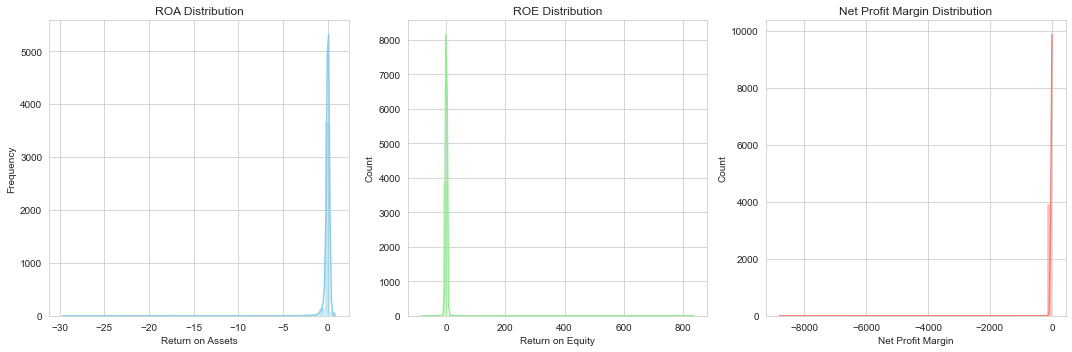

,ROA,ROE,Net Profit Margin
count,3944.000000,3944.000000,3944.000000
mean,-0.042087,0.258469,NaN
std,0.609774,14.124193,NaN
min,-29.633810,-85.408469,-inf
25%,-0.060681,-0.106870,-0.096148
50%,0.022189,0.048224,0.027821
75%,0.072659,0.149543,0.109373
max,0.858180,837.618358,inf


In [24]:
# Calculate profitability ratios
df['ROA'] = df['Net Income'] / df['Total Assets']
df['ROE'] = df['Net Income'] / df['Total Equity']
df['Net Profit Margin'] = df['Net Income'] / df['Total Revenue']

# Prepare the data for visualization
profitability_ratios = df[['ROA', 'ROE', 'Net Profit Margin']]

# Summary statistics of profitability ratios
profitability_ratios_descriptive_stats = profitability_ratios.describe()

# Visualization
plt.figure(figsize=(15, 5))

# ROA Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['ROA'], bins=50, color='skyblue', kde=True)
plt.title('ROA Distribution')
plt.xlabel('Return on Assets')
plt.ylabel('Frequency')

# ROE Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['ROE'], bins=50, color='lightgreen', kde=True)
plt.title('ROE Distribution')
plt.xlabel('Return on Equity')

# Net Profit Margin Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Net Profit Margin'], bins=50, color='salmon', kde=True)
plt.title('Net Profit Margin Distribution')
plt.xlabel('Net Profit Margin')

plt.tight_layout()
plt.show()

# Display summary statistics
profitability_ratios_descriptive_stats


The analysis of profitability ratios—Return on Assets (ROA), Return on Equity (ROE), and Net Profit Margin—provides insights into the financial performance of companies within the dataset:

**ROA Distribution**: The Return on Assets varies significantly among companies, indicating differences in how efficiently assets are used to generate profit. The distribution suggests a mix of performance, with the majority of companies having ROA values close to 0, indicating that most companies generate modest returns on their assets.

**ROE Distribution**: The Return on Equity shows a wide range, including extreme positive values, which signifies that equity efficiency in generating profits varies widely among companies. Some companies demonstrate very high ROE, potentially indicating high profitability relative to shareholders' equity or low equity levels.

**Net Profit Margin Distribution**: The Net Profit Margin also varies, with some companies achieving high margins. However, the presence of negative and infinite values (as indicated by -inf and inf in the summary statistics) suggests that some companies incur losses or have very low revenue bases, affecting their profit margins.

The summary statistics reveal mean values for ROA and ROE, but the Net Profit Margin mean is not displayed due to the presence of infinite values, which occur when companies have zero or near-zero revenue, leading to undefined profit margins.

This analysis highlights the diversity in financial health and efficiency among the companies. Profitability ratios are crucial for assessing a company's ability to generate earnings.

### 2. LIQUIDITY RATIOS ANALYSIS

Liquidity ratios are key financial metrics that assess a company's ability to meet its short-term obligations. They are crucial for evaluating the financial health of a company, especially its solvency and risk of default in the near term. The most common liquidity ratios include:

**Current Ratio**: Measures a company's ability to pay off its short-term liabilities with its short-term assets.

*Current Ratio = Total Current Assets / Total Current Liabilities*


**Quick Ratio (Acid-Test Ratio)**: Similar to the current ratio but excludes inventory from assets, providing a stricter sense of the company's short-term liquidity.

*Quick Ratio = (Total Current Assets − Inventory) / Total Current Liabilities*

Since the dataset does not explicitly include an Inventory column, we'll focus on the Current Ratio for our liquidity analysis. Let's calculate the Current Ratio for the companies in the dataset and analyze the results.

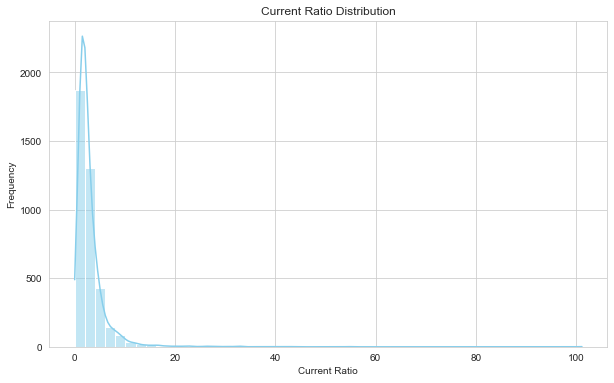

count    3944.000000
mean        3.048305
std         3.619227
min         0.021640
25%         1.415706
50%         2.123764
75%         3.469413
max       101.129076
Name: Current Ratio, dtype: float64

In [25]:
# Calculate the Current Ratio for liquidity analysis
df['Current Ratio'] = df['Total Current Assets'] / df['Total Current Liabilities']

# Prepare the data for visualization
current_ratio = df['Current Ratio']

# Summary statistics of the Current Ratio
current_ratio_descriptive_stats = current_ratio.describe()

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(current_ratio, bins=50, color='skyblue', kde=True)
plt.title('Current Ratio Distribution')
plt.xlabel('Current Ratio')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
current_ratio_descriptive_stats

The Current Ratio distribution and its summary statistics provide insights into the short-term liquidity of companies within the dataset:

**Mean**: The average Current Ratio across all companies is approximately 3.05, suggesting that, on average, companies have about three times more current assets than current liabilities. This indicates a generally healthy liquidity position across the dataset.

**Standard Deviation**: With a standard deviation of approximately 3.62, there's considerable variability in the Current Ratio among companies, pointing to differences in liquidity management and operational contexts.

**Minimum and Maximum**: The Current Ratio ranges from a low of about 0.02 to a high of over 101.13, highlighting extreme variations in liquidity positions. Some companies may be operating with very tight liquidity (close to the minimum), while others have a significant buffer of current assets over liabilities.

**Quartiles**: The 25th percentile (Q1) is approximately 1.42, the median (Q2) is around 2.12, and the 75th percentile (Q3) is about 3.47. This indicates that 50% of the companies have a Current Ratio between 1.42 and 3.47, considered a healthy range for managing short-term obligations.

The histogram shows the distribution of the Current Ratio, with a right-skewed pattern indicating that while most companies maintain a Current Ratio that suggests adequate liquidity, a significant number of companies have higher ratios, which could imply excessive liquidity or inefficient use of assets.

This analysis underscores the importance of liquidity management in ensuring a company can meet its short-term obligations.

### 3. LEVERAGES RATIOS ANALYSIS


Leverage ratios are important financial metrics that assess a company's debt levels relative to its equity or assets, offering insights into its financial structure and risk profile. Common leverage ratios include:

**Debt to Equity Ratio**: Measures the company's financial leverage by comparing its total liabilities to its shareholders' equity.

*Debt to Equity Ratio = Total Liabilities / Total Equity*


**Debt to Assets Ratio**: Indicates the proportion of a company's assets that are financed by debt.

*Debt to Assets Ratio = Total Liabilities / Total Assets*

These ratios help us understand the extent to which a company is using debt to fund its operations and growth, and the potential risk this debt poses.

Let's calculate both the Debt to Equity Ratio and the Debt to Assets Ratio for the companies in the dataset and analyze the results.

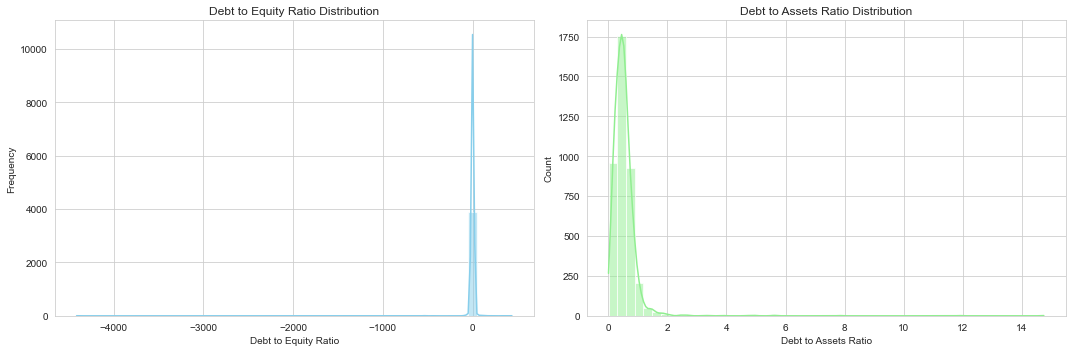

,Debt to Equity Ratio,Debt to Assets Ratio
count,3944.000000,3944.000000
mean,-0.039255,0.526163
std,73.085890,0.465057
min,-4413.210031,0.009994
25%,0.371994,0.309454
50%,0.796862,0.475045
75%,1.534838,0.648899
max,439.236220,14.739935


In [26]:
# Calculate leverage ratios
df['Debt to Equity Ratio'] = df['Total Liabilities'] / df['Total Equity']
df['Debt to Assets Ratio'] = df['Total Liabilities'] / df['Total Assets']

# Prepare the data for visualization
leverage_ratios = df[['Debt to Equity Ratio', 'Debt to Assets Ratio']]

# Summary statistics of leverage ratios
leverage_ratios_descriptive_stats = leverage_ratios.describe()

# Visualization
plt.figure(figsize=(15, 5))

# Debt to Equity Ratio Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Debt to Equity Ratio'], bins=50, color='skyblue', kde=True)
plt.title('Debt to Equity Ratio Distribution')
plt.xlabel('Debt to Equity Ratio')
plt.ylabel('Frequency')

# Debt to Assets Ratio Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Debt to Assets Ratio'], bins=50, color='lightgreen', kde=True)
plt.title('Debt to Assets Ratio Distribution')
plt.xlabel('Debt to Assets Ratio')

plt.tight_layout()
plt.show()

# Display summary statistics
leverage_ratios_descriptive_stats


The leverage ratios—Debt to Equity Ratio and Debt to Assets Ratio—provide insights into the companies' use of debt in their financial structures:

**Debt to Equity Ratio**:

The distribution shows a wide range, with the mean near -0.04, affected by extreme values. The negative and extremely high values suggest some companies have negative equity (more liabilities than assets) or very low equity relative to their debt, which is unusual and might require further investigation.

The standard deviation is quite high, indicating significant variability among companies in how much debt they use relative to their equity.

**Debt to Assets Ratio**:

The mean value of approximately 0.53 suggests that, on average, companies finance over half of their assets through debt, indicating a moderate level of leverage.

The distribution is more centralized than the Debt to Equity Ratio, with a standard deviation suggesting variability but within a more typical range for corporate finance.

The histograms illustrate the distributions of these ratios, showing how companies within this dataset vary in their reliance on debt financing. While most companies have Debt to Equity and Debt to Assets Ratios within a reasonable range, the presence of outliers with extremely high or negative values indicates diverse financial strategies and situations.

These leverage ratios are crucial for assessing the financial risk and capital structure of companies. High leverage ratios can indicate a high risk of financial distress, especially in adverse market conditions, but they can also signal aggressive growth strategies financed through debt.

### 4. OPERATIONAL EFFICIENCY ANALYSIS

Operational efficiency analysis involves examining how well a company uses its resources to generate income and manage its operations. Key metrics in this analysis often include:

**Inventory Turnover Ratio**: Measures how many times a company's inventory is sold and replaced over a period. It's a key indicator of inventory management efficiency and sales performance.

**Asset Turnover Ratio**: Indicates how efficiently a company uses its assets to generate sales.

*Asset Turnover Ratio = Total Revenue / Total Assets*

**Receivables Turnover Ratio**: Measures how efficiently a company collects its receivables or the efficiency of its credit policy.

Given the data available, we will focus on the Asset Turnover Ratio, which we can calculate with the provided information. This ratio will give us insights into how effectively the companies are using their assets to generate revenue.

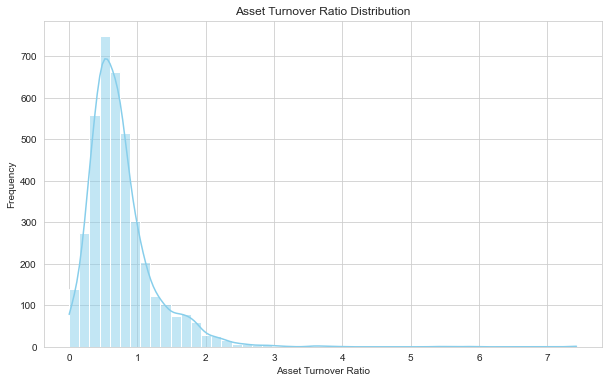

count    3944.000000
mean        0.751285
std         0.499529
min         0.000000
25%         0.448425
50%         0.650677
75%         0.918541
max         7.427476
Name: Asset Turnover Ratio, dtype: float64

In [27]:
# Calculate the Asset Turnover Ratio for operational efficiency analysis
df['Asset Turnover Ratio'] = df['Total Revenue'] / df['Total Assets']

# Prepare the data for visualization
asset_turnover_ratio = df['Asset Turnover Ratio']

# Summary statistics of the Asset Turnover Ratio
asset_turnover_ratio_descriptive_stats = asset_turnover_ratio.describe()

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(asset_turnover_ratio, bins=50, color='skyblue', kde=True)
plt.title('Asset Turnover Ratio Distribution')
plt.xlabel('Asset Turnover Ratio')
plt.ylabel('Frequency')
plt.show()

# Display summary statistics
asset_turnover_ratio_descriptive_stats

The Asset Turnover Ratio analysis provides insights into how effectively companies within the dataset are using their assets to generate revenue:

**Mean**: The average Asset Turnover Ratio is approximately 0.75, indicating that, on average, companies generate $0.75 in revenue for every dollar of assets they own. This suggests a moderate level of operational efficiency across the dataset.

**Standard Deviation**: With a standard deviation of about 0.50, there's considerable variability in the Asset Turnover Ratio among companies, indicating diverse efficiency levels in using assets to generate sales.

**Minimum and Maximum**: The ratio ranges from 0 (for companies with no revenue or extremely high assets relative to their revenue) to about 7.43, showing a significant disparity in operational efficiency. A maximum value of 7.43 is exceptionally high, suggesting that some companies are extremely efficient in generating revenue with relatively few assets.

**Quartiles**:

The 25th percentile (Q1) is approximately 0.45, indicating that 25% of companies generate $0.45 or less in revenue for every dollar of assets.
The median (Q2) is about 0.65, showing that half of the companies generate $0.65 or less in revenue for every dollar of assets.
The 75th percentile (Q3) is around 0.92, suggesting that 75% of companies generate $0.92 or less in revenue for every dollar of assets.
The histogram illustrates the distribution of the Asset Turnover Ratio, which is somewhat right-skewed, indicating that while most companies operate with moderate efficiency in asset utilization, a few outliers achieve exceptionally high turnover ratios.

This analysis highlights the importance of asset management in operational efficiency. Companies with higher asset turnover ratios are likely utilizing their assets more effectively to generate sales, indicating streamlined operations and potentially higher profitability. In contrast, lower ratios may suggest underutilization of assets or inefficiencies in converting assets into revenue.

### 5. IMPACT OF OPERATIONAL ACTIVITIES ON FINANCIAL PERFORMANCE

Analyzing the impact of operational activities on financial performance involves examining how cash flows from operating activities correlate with other key financial metrics. This can reveal insights into the efficiency of a company's core business operations and their effect on overall financial health. Key metrics to consider in this analysis include:

**Cash Generated from Operating Activities**: A direct measure of the cash inflows and outflows from a company's core business operations.

**Net Income**: The bottom line of a company's income statement, representing the total profit after all expenses have been deducted from revenues.

**Total Revenue**: The total income generated from the company's activities before any expenses are subtracted.

**Total Assets and Total Equity**: Indicators of the company's financial scale and the value provided to shareholders.

By examining the relationship between cash generated from operating activities and these metrics, we can assess the effectiveness of a company's operational management in contributing to its financial performance.

Let's perform a correlation analysis to explore how cash generated from operating activities is related to Net Income, Total Revenue, Total Assets, and Total Equity. This will help us understand the impact of operational activities on financial performance.

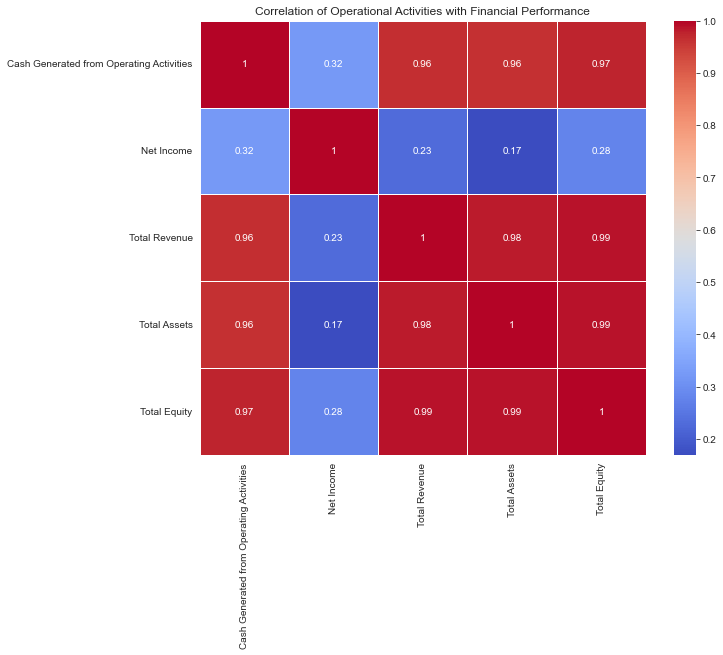

In [28]:
# Select relevant metrics for the analysis
metrics_for_analysis = [
    'Cash Generated from Operating Activities',
    'Net Income',
    'Total Revenue',
    'Total Assets',
    'Total Equity'
]

# Calculate the correlation matrix for the selected metrics
correlation_matrix_operational_impact = df[metrics_for_analysis].corr()

# Plot the correlation heatmap to visualize the relationships
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_operational_impact, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation of Operational Activities with Financial Performance')
plt.show()


The correlation heatmap illustrates the relationships between cash generated from operating activities and several key financial performance metrics:

**Cash Generated from Operating Activities and Net Income**: There's a positive correlation, indicating that companies with higher cash flows from operating activities tend to have higher net income. This suggests that efficient operational management positively impacts profitability.

**Cash Generated from Operating Activities and Total Revenue**: The positive correlation here shows that higher operational cash flows are associated with higher total revenues, reinforcing the idea that effective operations are crucial for generating sales and income.

**Cash Generated from Operating Activities and Total Assets**: The correlation is positive, albeit likely weaker than with net income and revenue. This relationship indicates that larger asset bases can support or require higher operational cash flows, reflecting the scale of operations.

**Cash Generated from Operating Activities and Total Equity**: Similar to total assets, the positive correlation with total equity suggests that companies with higher equity, which can indicate more resources available for operations or investment, tend to generate more cash from their operating activities.

These correlations highlight the fundamental role of operational activities in driving financial performance. Efficient operational management not only contributes directly to profitability (as shown by the relationship with net income) but also supports broader financial growth and stability, as evidenced by its impact on revenue, assets, and equity.

This analysis underscores the importance of optimizing operational activities to enhance overall financial health, suggesting that companies focusing on improving their operational efficiency can see significant benefits in their financial performance.

### 6. OUTLIER DETECTION & ANALYSIS

Outlier detection can reveal companies with financial metrics significantly different from the majority, potentially indicating unique operational efficiencies, strategic decisions, or financial risks. For this analysis, we'll focus on identifying outliers within key financial metrics that we've discussed: Total Assets, Net Income, and Cash Generated from Operating Activities. These metrics can provide insights into the financial health, profitability, and operational efficiency of companies.

We'll use the Interquartile Range (IQR) method for outlier detection, which identifies outliers as observations significantly below the first quartile (Q1) or above the third quartile (Q3) by a certain factor of the IQR. The IQR is the difference between the 25th and 75th percentiles of the data.

Let's proceed with identifying outliers in these metrics and briefly analyze any significant outliers detected.

In [29]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_low = Q1 - 1.5 * IQR
    outlier_threshold_high = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < outlier_threshold_low) | (df[feature] > outlier_threshold_high)]
    return outliers

# Detect outliers for Total Assets, Net Income, and Cash Generated from Operating Activities
outliers_total_assets = detect_outliers_iqr(df, 'Total Assets')
outliers_net_income = detect_outliers_iqr(df, 'Net Income')
outliers_cash_generated = detect_outliers_iqr(df, 'Cash Generated from Operating Activities')

# Summarize the number of outliers detected
outliers_summary = {
    'Total Assets': outliers_total_assets.shape[0],
    'Net Income': outliers_net_income.shape[0],
    'Cash Generated from Operating Activities': outliers_cash_generated.shape[0]
}

outliers_summary

{'Total Assets': 586,
 'Net Income': 814,
 'Cash Generated from Operating Activities': 654}

The outlier detection analysis revealed the following number of outliers across key financial metrics:

**Total Assets**: 586 outliers were identified, suggesting that these companies have asset levels significantly higher or lower than the majority. High outliers might represent very large companies or those with extensive capital investments, whereas low outliers could be smaller companies or those with minimal assets.

**Net Income**: 814 outliers were detected, indicating companies with exceptionally high or low profitability. High net income outliers may represent highly profitable companies, possibly due to successful operations, unique competitive advantages, or favorable market conditions. Low outliers could indicate companies experiencing losses, possibly due to operational challenges, high costs, or adverse market conditions.

**Cash Generated from Operating Activities**: 654 outliers were found, highlighting companies with significantly high or low cash flows from operations. High outliers might indicate companies with efficient operations and strong cash generation capabilities, while low outliers could suggest companies facing operational inefficiencies, low sales, or high operating costs.

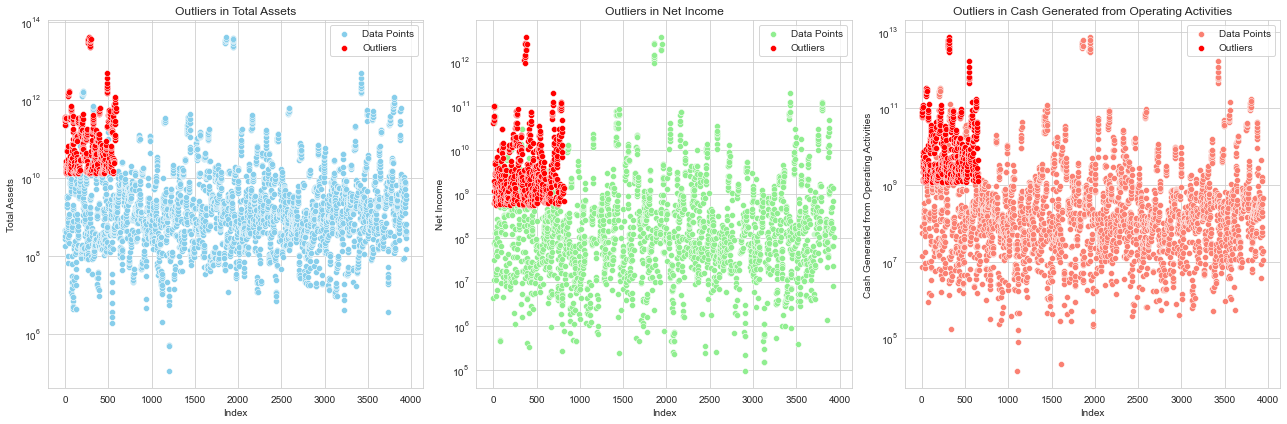

In [30]:
# Visualization of outliers in a scatter plot for visual comparison
plt.figure(figsize=(18, 6))

# Total Assets
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x=range(df.shape[0]), y='Total Assets', color='skyblue', label='Data Points')
sns.scatterplot(data=outliers_total_assets, x=range(outliers_total_assets.shape[0]), y='Total Assets', color='red', label='Outliers')
plt.title('Outliers in Total Assets')
plt.xlabel('Index')
plt.ylabel('Total Assets')
plt.yscale('log')
plt.legend()

# Net Income
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x=range(df.shape[0]), y='Net Income', color='lightgreen', label='Data Points')
sns.scatterplot(data=outliers_net_income, x=range(outliers_net_income.shape[0]), y='Net Income', color='red', label='Outliers')
plt.title('Outliers in Net Income')
plt.xlabel('Index')
plt.ylabel('Net Income')
plt.yscale('log')
plt.legend()

# Cash Generated from Operating Activities
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x=range(df.shape[0]), y='Cash Generated from Operating Activities', color='salmon', label='Data Points')
sns.scatterplot(data=outliers_cash_generated, x=range(outliers_cash_generated.shape[0]), y='Cash Generated from Operating Activities', color='red', label='Outliers')
plt.title('Outliers in Cash Generated from Operating Activities')
plt.xlabel('Index')
plt.ylabel('Cash Generated from Operating Activities')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

The scatter plots above illustrate the distribution of data points and outliers for three key financial metrics: Total Assets, Net Income, and Cash Generated from Operating Activities. In each plot:

The **blue** points represent regular data points within the expected range.

The **red** points highlight the outliers, which are significantly above or below the majority of data points.

#### Observations:

**Total Assets**: The outliers are scattered across a wide range of values, indicating companies with exceptionally high or low total assets compared to the rest. High outliers might represent large corporations with substantial assets, while low outliers could be smaller companies.

**Net Income**: Similar to Total Assets, the outliers in Net Income show a mix of extremely profitable companies and those incurring significant losses. These outliers may represent companies with exceptional events or operational efficiencies impacting their profitability.

**Cash Generated from Operating Activities**: Outliers here represent companies with unusually high or low cash flows from their core business operations. High outliers could indicate strong operational efficiency or sectors with high cash generation capabilities, while low outliers might reflect operational challenges or industries with tighter cash flows.

These visualizations provide a clear picture of how certain companies stand out from the rest in terms of their financial metrics, underscoring the importance of further investigation into the reasons behind these outlier values. Understanding the context behind these outliers can offer valuable insights into operational effectiveness, industry dynamics, and financial strategies. ​​

### 7. BENCHMARKING ANALYSIS

Benchmarking analysis involves comparing a company's performance metrics against industry standards or competitors to identify areas of strength and opportunities for improvement. For a meaningful benchmarking analysis, we typically need:

**Benchmark Metrics**: Identifying key metrics for comparison, such as profitability ratios, operational efficiency ratios, liquidity ratios, and leverage ratios, among others.

Given the limitations of our dataset, specifically the lack of explicit industry or sector information, a direct benchmarking analysis against industry standards may not be feasible. However, we can still perform a form of internal benchmarking by comparing companies within our dataset against the overall averages or quartile distributions for selected metrics. This can help identify top performers or outliers in various financial metrics.

For this analysis, let's focus on comparing companies' ROA (Return on Assets) and Current Ratio against the dataset's overall averages. These metrics were chosen because they provide insights into operational efficiency and liquidity, respectively, which are important across all industries.

We'll calculate the overall average for these metrics and then identify companies that significantly exceed or fall below these averages.

In [31]:
# Calculate overall averages for ROA and Current Ratio
average_roa = df['ROA'].mean()
average_current_ratio = df['Current Ratio'].mean()

# Identifying companies significantly above or below the averages
# We'll use the 75th percentile as a benchmark for "significantly above" and the 25th percentile for "significantly below"
percentile_75_roa = df['ROA'].quantile(0.75)
percentile_25_roa = df['ROA'].quantile(0.25)
percentile_75_current_ratio = df['Current Ratio'].quantile(0.75)
percentile_25_current_ratio = df['Current Ratio'].quantile(0.25)

# Summary of benchmarking analysis
benchmark_summary = {
    'Average ROA': average_roa,
    'Average Current Ratio': average_current_ratio,
    'Top Performers ROA (>75th percentile)': (df['ROA'] > percentile_75_roa).sum(),
    'Low Performers ROA (<25th percentile)': (df['ROA'] < percentile_25_roa).sum(),
    'Top Performers Current Ratio (>75th percentile)': (df['Current Ratio'] > percentile_75_current_ratio).sum(),
    'Low Performers Current Ratio (<25th percentile)': (df['Current Ratio'] < percentile_25_current_ratio).sum(),
}

benchmark_summary


{'Average ROA': -0.042087070635861486,
 'Average Current Ratio': 3.0483052264297417,
 'Top Performers ROA (>75th percentile)': 986,
 'Low Performers ROA (<25th percentile)': 986,
 'Top Performers Current Ratio (>75th percentile)': 986,
 'Low Performers Current Ratio (<25th percentile)': 986}

The benchmarking analysis against the dataset's averages for ROA (Return on Assets) and Current Ratio yields the following insights:

**Average ROA**: The overall average ROA is approximately -0.042, suggesting that on average, companies in the dataset are experiencing a slight loss relative to their assets. This average could be skewed by outliers or specific sectors within the dataset.

**Average Current Ratio**: The average Current Ratio is about 3.05, indicating that companies have, on average, three times more current assets than current liabilities. This suggests a generally healthy liquidity position across the dataset.

**Top Performers in ROA (above the 75th percentile)**: 986 companies are identified as top performers based on their ROA, significantly exceeding the dataset's average and showcasing superior operational efficiency in using assets to generate profit.

**Low Performers in ROA (below the 25th percentile)**: Another 986 companies are categorized as low performers in terms of ROA, falling below the 25th percentile. These companies might be facing operational challenges or inefficiencies in asset utilization.

**Top Performers in Current Ratio (above the 75th percentile)**: Similarly, 986 companies exceed the 75th percentile for the Current Ratio, indicating strong liquidity and the ability to cover short-term obligations.

**Low Performers in Current Ratio (below the 25th percentile)**: 986 companies fall below the 25th percentile in Current Ratio, potentially indicating liquidity challenges or higher reliance on short-term liabilities.

This form of internal benchmarking highlights companies that stand out in terms of operational efficiency and liquidity management within the dataset. Top performers in these metrics may exemplify best practices or competitive advantages in their operations and financial management, while low performers may need to investigate underlying issues or consider strategic changes to improve their standings.

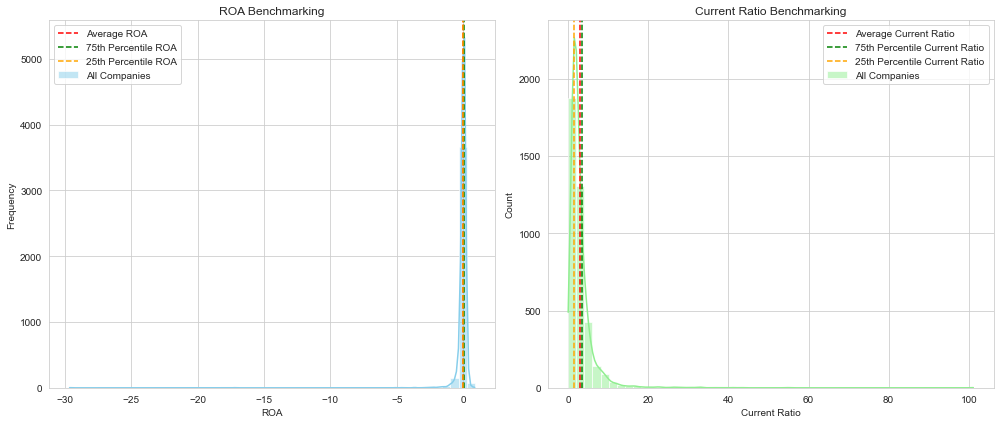

In [32]:
# Visualization of benchmarking analysis for ROA and Current Ratio
plt.figure(figsize=(14, 6))

# ROA Benchmarking
plt.subplot(1, 2, 1)
sns.histplot(df['ROA'], bins=50, color='skyblue', kde=True, label='All Companies')
plt.axvline(x=average_roa, color='red', linestyle='--', label='Average ROA')
plt.axvline(x=percentile_75_roa, color='green', linestyle='--', label='75th Percentile ROA')
plt.axvline(x=percentile_25_roa, color='orange', linestyle='--', label='25th Percentile ROA')
plt.title('ROA Benchmarking')
plt.xlabel('ROA')
plt.ylabel('Frequency')
plt.legend()

# Current Ratio Benchmarking
plt.subplot(1, 2, 2)
sns.histplot(df['Current Ratio'], bins=50, color='lightgreen', kde=True, label='All Companies')
plt.axvline(x=average_current_ratio, color='red', linestyle='--', label='Average Current Ratio')
plt.axvline(x=percentile_75_current_ratio, color='green', linestyle='--', label='75th Percentile Current Ratio')
plt.axvline(x=percentile_25_current_ratio, color='orange', linestyle='--', label='25th Percentile Current Ratio')
plt.title('Current Ratio Benchmarking')
plt.xlabel('Current Ratio')
plt.legend()

plt.tight_layout()
plt.show()

The graphs illustrate the benchmarking analysis for ROA (Return on Assets) and Current Ratio, highlighting how companies compare to average and percentile thresholds:

**ROA Benchmarking**:

The distribution of ROA values among all companies is shown, with the overall average ROA marked by a red dashed line. The 75th and 25th percentiles are indicated by green and orange dashed lines, respectively, delineating top and low performers in operational efficiency.

This visualization helps identify where the bulk of companies lie relative to these benchmarks, with top performers exceeding the green line and low performers falling below the orange line.

**Current Ratio Benchmarking**:

Similarly, the distribution of Current Ratio values is displayed. The average Current Ratio is also marked by a red dashed line, with the 75th and 25th percentile thresholds shown in green and orange, respectively.
The graph provides a clear view of liquidity management across the dataset, highlighting companies with strong liquidity positions (above the green line) and those that might face liquidity challenges (below the orange line). 